# TFL Cycling Data Analysis

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo


import requests
from io import StringIO
from datetime import datetime, timedelta

# Data Preprocessing

In [461]:

# Function to extract date and time information from the dataset
def extract_date_time(df):

    # Calculate the duration in days
    df['Duration Days'] = (df['End Date'] - df['Start Date']).dt.days
    
    # Convert Duration from seconds to hours and minutes
    df["Duration Hours"] = df["Duration"] / 3600  # Calculate minutes

    # Convert Duration from seconds to minutes
    df["Duration Minutes"] = df["Duration"] / 60  # Calculate minutes

    # Extract year and month from Start Date
    df["Start Year"] = df["Start Date"].dt.year
    df["Start Month"] = df["Start Date"].dt.month
    
    # Extract day of the week and hour of the day from Start Date
    df["Start Day of Week"] = df["Start Date"].dt.day_name()
    df["Start Hour"] = df["Start Date"].dt.hour
    
    return df


# Custom function to convert "Xm Ys" or "Xh Ym Zs" format to seconds
def convert_duration(duration):
    if isinstance(duration, int):
        return duration  # Already in seconds
    try:
      total_seconds = 0
      parts = duration.split()
      for part in parts:
          if part.endswith('h'):
              total_seconds += int(part[:-1]) * 3600  # Convert hours to seconds
          elif part.endswith('m'):
              total_seconds += int(part[:-1]) * 60  # Convert minutes to seconds
          elif part.endswith('s'):
              total_seconds += int(part[:-1])  # Seconds
    except:
      pass
    return total_seconds

# Function to convert mixed date formats to datetime
def convert_to_datetime(tfl_cycling_df):
    # Define datetime format for 'YYYY-MM-DD HH:MM'
    format1 = '%Y-%m-%d %H:%M'

    # Define datetime format for 'DD/MM/YYYY HH:MM'
    format2 = '%d/%m/%Y %H:%M'

    # Convert 'Start Date' and 'End Date' columns using pd.to_datetime
    tfl_cycling_df['Start Date'] = pd.to_datetime(tfl_cycling_df['Start Date'], errors='coerce', format=format1).combine_first(
        pd.to_datetime(tfl_cycling_df['Start Date'], errors='coerce', format=format2))

    tfl_cycling_df['End Date'] = pd.to_datetime(tfl_cycling_df['End Date'], errors='coerce', format=format1).combine_first(
        pd.to_datetime(tfl_cycling_df['End Date'], errors='coerce', format=format2))

    # Extract date and time information
    tfl_cycling_df = extract_date_time(tfl_cycling_df)

    return tfl_cycling_df


def data_preprocessing():
      # Create an empty DataFrame to store the data
      combined_df = pd.DataFrame()

      # Define column name mapping for consistency
      column_mapping = {
          "Number": "Rental Id",
          "Start date": "Start Date",
          "Start station number": "StartStation Id",
          "Start station": "StartStation Name",
          "End date": "End Date",
          "End station number": "EndStation Id",
          "End station": "EndStation Name",
          "Bike number": "Bike Id",
          "Bike model": "Bike Model",
          "Total duration": "Duration",
      }

      # Initial values
      index = 246
      start_date = datetime(2020, 12, 30)
      end_date = datetime(2021, 1, 5)

      # Define the target end date
      target_end_date = datetime(2023, 7, 1)
      not_found = []
      count = 0

      # Iterate to generate URLs with incremented values until end_date equals Jan2024
      while end_date < target_end_date:

          # Format the URLs
          start_month_year = start_date.strftime("%b%Y").capitalize()
          end_month_year = end_date.strftime("%b%Y").capitalize()
          csv_url = f"https://cycling.data.tfl.gov.uk/usage-stats/{index}JourneyDataExtract{start_date.strftime('%d%b%Y')}-{end_date.strftime('%d%b%Y')}.csv"
          print(csv_url)

          # Set a user-agent to mimic a web browser
          headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

          try:
              # Send a GET request
              response = requests.get(csv_url, headers=headers)

              # Read the CSV from the response content
              new_df = pd.read_csv(StringIO(response.text))

              # Rename columns to the consistent format
              new_df.rename(columns=column_mapping, inplace=True)

              # Append the new data to the combined DataFrame
              combined_df = pd.concat([combined_df, new_df], ignore_index=True)

          except:
              not_found.append(csv_url)
              count += 1


          if index == 374:
            break
          # Increment the index
          index += 1
          # Increment the start and end dates

          if (index == 334):
            start_date += timedelta(days=7)
            end_date += timedelta(days=5)
          elif (index == 335):
            start_date += timedelta(days=5)
            end_date += timedelta(days=7)
          else:
            start_date += timedelta(days=7)
            end_date += timedelta(days=7)

      combined_df['Duration'] = combined_df['Duration'].apply(convert_duration)
      combined_df.drop(columns='Total duration (ms)', inplace=True)
      
      return combined_df


In [462]:
tfl_cycling_df = data_preprocessing()

https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/247JourneyDataExtract06Jan2021-12Jan2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/248JourneyDataExtract13Jan2021-19Jan2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/249JourneyDataExtract20Jan2021-26Jan2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/250JourneyDataExtract27Jan2021-02Feb2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/251JourneyDataExtract03Feb2021-09Feb2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/252JourneyDataExtract10Feb2021-16Feb2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/253JourneyDataExtract17Feb2021-23Feb2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/254JourneyDataExtract24Feb2021-02Mar2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/255JourneyDataExtract03Mar2021-09Mar2021.csv
https://cycling.data.tfl.gov.uk/usage-stats/256JourneyDataExtract10Mar2021-16Mar2021.csv
https://cycling.data.

https://cycling.data.tfl.gov.uk/usage-stats/339JourneyDataExtract10Oct2022-16Oct2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/340JourneyDataExtract17Oct2022-23Oct2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/341JourneyDataExtract24Oct2022-30Oct2022.csv


/var/folders/19/fjpzxfh14fs7g1q_qm96qd880000gp/T/ipykernel_71272/821265795.py:108: DtypeWarning:

Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.



https://cycling.data.tfl.gov.uk/usage-stats/342JourneyDataExtract31Oct2022-06Nov2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/343JourneyDataExtract07Nov2022-13Nov2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/344JourneyDataExtract14Nov2022-20Nov2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/345JourneyDataExtract21Nov2022-27Nov2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/346JourneyDataExtract28Nov2022-04Dec2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/347JourneyDataExtract05Dec2022-11Dec2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/348JourneyDataExtract12Dec2022-18Dec2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/349JourneyDataExtract19Dec2022-25Dec2022.csv
https://cycling.data.tfl.gov.uk/usage-stats/350JourneyDataExtract26Dec2022-01Jan2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/351JourneyDataExtract02Jan2023-08Jan2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/352JourneyDataExtract09Jan2023-15Jan2023.csv
https://cycling.data.

/var/folders/19/fjpzxfh14fs7g1q_qm96qd880000gp/T/ipykernel_71272/821265795.py:108: DtypeWarning:

Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.



https://cycling.data.tfl.gov.uk/usage-stats/362JourneyDataExtract20Mar2023-26Mar2023.csv


/var/folders/19/fjpzxfh14fs7g1q_qm96qd880000gp/T/ipykernel_71272/821265795.py:108: DtypeWarning:

Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.



https://cycling.data.tfl.gov.uk/usage-stats/363JourneyDataExtract27Mar2023-02Apr2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/364JourneyDataExtract03Apr2023-09Apr2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/365JourneyDataExtract10Apr2023-16Apr2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/366JourneyDataExtract17Apr2023-23Apr2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/367JourneyDataExtract24Apr2023-30Apr2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/368JourneyDataExtract01May2023-07May2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/369JourneyDataExtract08May2023-14May2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/370JourneyDataExtract15May2023-21May2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/371JourneyDataExtract22May2023-28May2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/372JourneyDataExtract29May2023-04Jun2023.csv
https://cycling.data.tfl.gov.uk/usage-stats/373JourneyDataExtract05Jun2023-11Jun2023.csv
https://cycling.data.

In [5]:
tfl_cycling_df_preprocessed = convert_to_datetime(tfl_cycling_df)

In [6]:
tfl_cycling_df_preprocessed.to_csv('tfl_cycling_data.csv', index=False)

In [ ]:
#tfl_cycling_df_preprocessed = pd.read_csv("tfl_cycling_data.csv")

In [7]:
tfl_cycling_df_preprocessed.columns

Index(['Rental Id', 'Duration', 'Bike Id', 'End Date', 'EndStation Id',
       'EndStation Name', 'Start Date', 'StartStation Id', 'StartStation Name',
       'Bike Model', 'Duration Days', 'Duration Hours', 'Duration Minutes',
       'Start Year', 'Start Month', 'Start Day of Week', 'Start Hour'],
      dtype='object')

In [9]:
tfl_cycling_df_preprocessed.head(10)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Bike Model,Duration Days,Duration Hours,Duration Minutes,Start Year,Start Month,Start Day of Week,Start Hour
0,104820582,1620,22,2021-01-03 15:14:00,11.0,"Brunswick Square, Bloomsbury",2021-01-03 14:47:00,542,"Salmon Lane, Limehouse",NaN,0,0.450000,27.0,2021,1,Sunday,14
1,104816169,1740,10755,2021-01-03 13:26:00,542.0,"Salmon Lane, Limehouse",2021-01-03 12:57:00,546,"New Fetter Lane, Holborn",NaN,0,0.483333,29.0,2021,1,Sunday,12
2,104757113,1620,18908,2020-12-30 15:00:00,239.0,"Warren Street Station, Euston",2020-12-30 14:33:00,779,"Houndsditch, Aldgate",NaN,0,0.450000,27.0,2020,12,Wednesday,14
3,104749458,780,18499,2020-12-30 09:21:00,766.0,"Ram Street, Wandsworth",2020-12-30 09:08:00,653,"Simpson Street, Clapham Junction",NaN,0,0.216667,13.0,2020,12,Wednesday,9
4,104788389,5400,15668,2021-01-01 16:29:00,655.0,"Crabtree Lane, Fulham",2021-01-01 14:59:00,655,"Crabtree Lane, Fulham",NaN,0,1.500000,90.0,2021,1,Friday,14
5,104792584,240,6695,2021-01-01 21:02:00,682.0,"Crisp Road, Hammersmith",2021-01-01 20:58:00,655,"Crabtree Lane, Fulham",NaN,0,0.066667,4.0,2021,1,Friday,20
6,104777428,5940,6695,2020-12-31 18:49:00,655.0,"Crabtree Lane, Fulham",2020-12-31 17:10:00,655,"Crabtree Lane, Fulham",NaN,0,1.650000,99.0,2020,12,Thursday,17
7,104791339,1860,6695,2021-01-01 18:28:00,655.0,"Crabtree Lane, Fulham",2021-01-01 17:57:00,655,"Crabtree Lane, Fulham",NaN,0,0.516667,31.0,2021,1,Friday,17
8,104762231,6060,8883,2020-12-30 18:57:00,682.0,"Crisp Road, Hammersmith",2020-12-30 17:16:00,655,"Crabtree Lane, Fulham",NaN,0,1.683333,101.0,2020,12,Wednesday,17
9,104776884,720,3424,2020-12-31 16:53:00,395.0,"Cadogan Gardens, Chelsea",2020-12-31 16:41:00,662,"Phene Street, Chelsea",NaN,0,0.200000,12.0,2020,12,Thursday,16


In [10]:
tfl_cycling_df_preprocessed.describe()

,Rental Id,Duration,Bike Id,Duration Days,Duration Hours,Duration Minutes,Start Year,Start Month,Start Hour
count,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07,2.606722e+07
mean,1.181858e+08,1.240298e+03,2.304620e+04,1.392017e-03,3.445271e-01,2.067163e+01,2.021728e+03,6.188202e+00,1.399801e+01
std,7.735912e+06,3.827923e+03,1.663516e+04,1.195454e-01,1.063312e+00,6.379871e+01,7.011454e-01,3.106090e+00,4.977164e+00
min,1.047482e+08,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+00,0.000000e+00
25%,1.115033e+08,4.920000e+02,1.340000e+04,0.000000e+00,1.366667e-01,8.200000e+00,2.021000e+03,4.000000e+00,1.000000e+01
50%,1.181748e+08,8.400000e+02,1.837400e+04,0.000000e+00,2.333333e-01,1.400000e+01,2.022000e+03,6.000000e+00,1.500000e+01
75%,1.248630e+08,1.320000e+03,2.209300e+04,0.000000e+00,3.666667e-01,2.200000e+01,2.022000e+03,9.000000e+00,1.800000e+01
max,1.316159e+08,5.874600e+05,9.999800e+04,6.500000e+01,1.631833e+02,9.791000e+03,2.023000e+03,1.200000e+01,2.300000e+01


# Exploratory Data Analysis

## Rental Anaysis

Examine the distribution of rental durations (in seconds) to identify patterns and outliers. This analysis can help understand the typical length of bike rentals.

### Rental duration by Days

In [96]:
filtered_df = tfl_cycling_df_preprocessed[tfl_cycling_df_preprocessed['Duration Days'] >= 0]

In [97]:
duration_days_counts = filtered_df['Duration Days'].value_counts()

In [98]:
duration_days_counts_df = duration_days_counts.reset_index()
duration_days_counts_df.columns = ['Duration Days', 'Count']

In [109]:
# Find the maximum count
max_count = duration_days_counts_df['Count'].max()

# Define a custom color mapping function
def set_color(count):
    if count == max_count:
        return 'DarkBlue'
    else:
        return 'SkyBlue'

# Apply the color mapping function to create a new column for colors
duration_days_counts_df['BarColor'] = duration_days_counts_df['Count'].apply(set_color)

# Create a histogram with custom colors
fig = px.histogram(
    duration_days_counts_df,
    x='Duration Days',
    y='Count',
    title='Distribution of Rental Durations in Days',
    color='BarColor',
    color_discrete_map={'DarkBlue': 'DarkBlue', 'SkyBlue': 'SkyBlue'},
    log_y=True,
    nbins = 30
)
fig.update_xaxes(title_text='Duration (Days)')
fig.update_yaxes(title_text='Number of Rentals')

# Add text annotations to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the Plotly figure
fig.show()


A significant majority of customers opt for short-term rentals, typically returning the rented bikes on the same day

### Rental duration by Hours

In [61]:
duration_hours_counts = filtered_df['Duration Hours'].value_counts()

In [62]:
duration_hours_counts_df = duration_hours_counts.reset_index()
duration_hours_counts_df.columns = ['Duration Hour', 'Count']


In [63]:
duration_hours_counts_df

,Duration Hour,Count
0,0.150000,903954
1,0.133333,898909
2,0.166667,892736
3,0.116667,879368
4,0.183333,874192
...,...,...
30739,17.618889,1
30740,67.016667,1
30741,39.550000,1
30742,11.721944,1


In [65]:
# Filter out non-numeric values in 'Duration Hour'
duration_hours_counts_df = duration_hours_counts_df[pd.to_numeric(duration_hours_counts_df['Duration Hour'], errors='coerce').notna()]

# Define custom bin labels
bin_labels = ['0-1 hr', '1-2 hr'] + [f'{i}-{i+1} hr' for i in range(2, 18)] + ['18+ hr']

# Define custom bins
bin_edges = [-1, 1, 2] + list(range(2, 19)) + [float('inf')]

# Perform custom binning with 'duplicates' argument
duration_hours_counts_df['Duration Hour Binned'] = pd.cut(pd.to_numeric(duration_hours_counts_df['Duration Hour']), bins=bin_edges, labels=bin_labels, duplicates='drop')

# Group and aggregate the data for the custom bins
custom_binned_counts = duration_hours_counts_df.groupby('Duration Hour Binned')['Count'].sum().reset_index()


In [66]:
custom_binned_counts

,Duration Hour Binned,Count
0,0-1 hr,25164262
1,1-2 hr,630555
2,2-3 hr,146389
3,3-4 hr,50770
4,4-5 hr,21750
5,5-6 hr,10726
6,6-7 hr,5816
7,7-8 hr,3946
8,8-9 hr,3149
9,9-10 hr,2613


In [181]:
# Create a bar chart with custom bins
fig = px.histogram(custom_binned_counts, x='Duration Hour Binned', title='Distribution of Rental Durations in Hours', y='Count', labels={'Duration Hour Binned': 'Duration Hours'}, nbins=35, log_y=True)
fig.update_xaxes(title_text='Duration (Hours)')
fig.update_yaxes(title_text='Number of Rentals')

# Find the index of the maximum count
max_count_index = custom_binned_counts['Count'].idxmax()

# Create a list of colors for the bars
colors = ['SkyBlue'] * len(custom_binned_counts)
colors[max_count_index] = 'darkblue'  # Change the color of the maximum count bar to dark blue

# Add text annotations to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside', marker=dict(color=colors))

# Show the Plotly figure
fig.show()


Most common usage pattern is for short trips or commutes within the same hour,


## Temporal Analysis
Analyze the temporal aspects of rentals, including:
- Start and End Date: Check for any trends in rental start and end dates.
- Start Year and Month: Understand how rentals are distributed across different years and months.
- Start Day of Week: Explore the distribution of rentals by day of the week.
- Start Hour: Analyze the hourly distribution of rentals.

In [424]:
# Create a list of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Start Date' column to a datetime object if it's not already
tfl_cycling_df_preprocessed['Start Date'] = pd.to_datetime(tfl_cycling_df_preprocessed['Start Date'])

# Filter out rows with 2020 data
tfl_cycling_df_preprocessed = tfl_cycling_df_preprocessed[tfl_cycling_df_preprocessed['Start Date'].dt.year > 2020]

# Create a categorical column for months
tfl_cycling_df_preprocessed['Start Month Category'] = pd.Categorical(
    tfl_cycling_df_preprocessed['Start Date'].dt.strftime('%B'),
    categories=months,
    ordered=True
)

# Group the data by year and month and count rentals
grouped_data = tfl_cycling_df_preprocessed.groupby([tfl_cycling_df_preprocessed['Start Date'].dt.year, 'Start Month Category'])['Rental Id'].count().unstack()

# Create a Plotly figure
traces = []
for month in months:
    traces.append(go.Bar(
        x=grouped_data.index,
        y=grouped_data[month].fillna(0),  # Fill NaN values with 0
        name=month
    ))

layout = go.Layout(
    title='Number of Rentals by Month for Each Year (Stacked)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Rentals'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)

# Add total rentals at the top of each bar
for i in range(len(grouped_data.index)):
    year = int(grouped_data.index[i])
    height = grouped_data.iloc[i].sum()
    fig.add_annotation(
        text=f'{year}',
        x=year,
        y=height,
        showarrow=False,
        xshift=0,
        yshift=10
    )

pyo.iplot(fig)


In [127]:
# Filter out rows with 2020 data
tfl_cycling_df_preprocessed = tfl_cycling_df_preprocessed[tfl_cycling_df_preprocessed['Start Date'].dt.year > 2020]


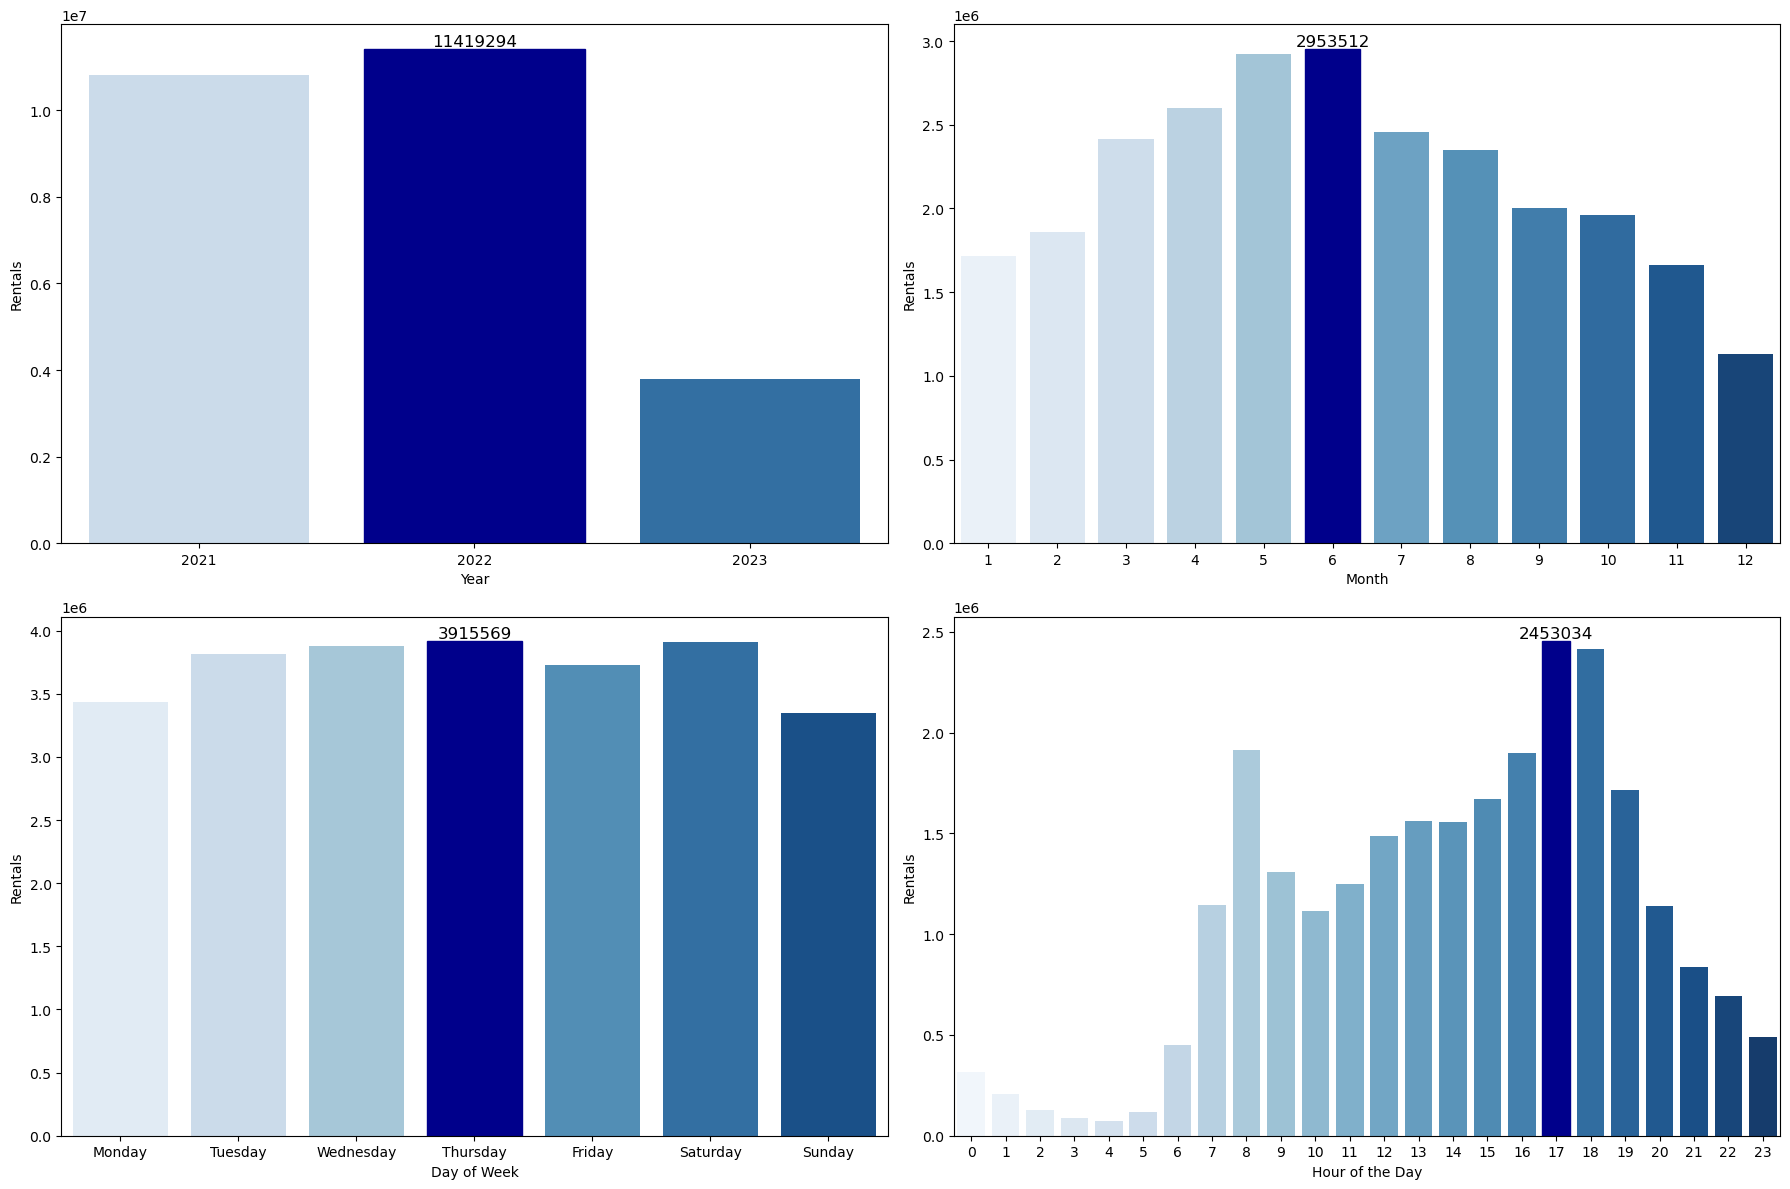

In [459]:
# Create a figure with subplots and increase the figure size
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Subplot 1: Distribution of Rentals by Year
ax1 = sns.countplot(data=tfl_cycling_df_preprocessed, x='Start Year', ax=axes[0, 0], palette="Blues")
ax1.set_xlabel('Year')
ax1.set_ylabel('Rentals')

# Subplot 2: Distribution of Rentals by Month
ax2 = sns.countplot(data=tfl_cycling_df_preprocessed, x='Start Month', ax=axes[0, 1], palette="Blues")
ax2.set_xlabel('Month')
ax2.set_ylabel('Rentals')

# Subplot 3: Distribution of Rentals by Day of Week
ax3 = sns.countplot(data=tfl_cycling_df_preprocessed, x='Start Day of Week', ax=axes[1, 0], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Blues")
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Rentals')

# Subplot 4: Distribution of Rentals by Hour of the Day
ax4 = sns.countplot(data=tfl_cycling_df_preprocessed, x='Start Hour', ax=axes[1, 1], palette="Blues")
ax4.set_xlabel('Hour of the Day')
ax4.set_ylabel('Rentals')

# Highlight the max value with dark blue and add data values at the top of each bar
for ax in [ax1, ax2, ax3, ax4]:
    max_value = max(ax.patches, key=lambda p: p.get_height())
    max_value.set_color('darkblue')
    for bar in ax.patches:
        if bar.get_height() == max_value.get_height():
            ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Bike Usage Analysis
Investigate the usage of different bike models and identify any preferences among customers. Check for missing data in the "Bike Model" column.

In [140]:
# Check for missing values in the 'Bike Model' column
missing_bike_models = tfl_cycling_df_preprocessed[tfl_cycling_df_preprocessed['Bike Model'] != "NaN"]
if not missing_bike_models.empty:
    print("Rows with missing 'Bike Model' data:")
    print(missing_bike_models)


Rows with missing 'Bike Model' data:
          Rental Id  Duration  Bike Id            End Date EndStation Id  \
0         104820582      1620       22 2021-01-03 15:14:00          11.0   
1         104816169      1740    10755 2021-01-03 13:26:00         542.0   
4         104788389      5400    15668 2021-01-01 16:29:00         655.0   
5         104792584       240     6695 2021-01-01 21:02:00         682.0   
7         104791339      1860     6695 2021-01-01 18:28:00         655.0   
...             ...       ...      ...                 ...           ...   
26067210  131400576      1306    57572 2023-06-12 00:22:00        300073   
26067211  131400577      2767    58990 2023-06-12 00:46:00           995   
26067212  131400578       931    61140 2023-06-12 00:16:00          3480   
26067213  131400579       943    56849 2023-06-12 00:16:00        200252   
26067214  131400580      1176    23563 2023-06-12 00:20:00        200167   

                                EndStation Name   

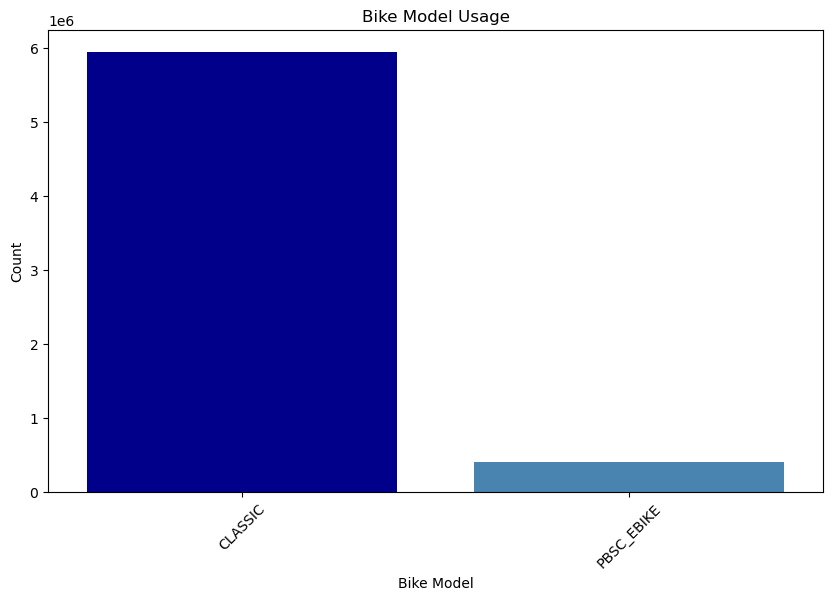

In [149]:
bike_model_counts = tfl_cycling_df_preprocessed['Bike Model'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values, palette="Blues")

# Find the maximum value
max_value = bike_model_counts.max()

# Highlight the maximum value with dark blue
for bar in ax.patches:
    if bar.get_height() == max_value:
        bar.set_facecolor('darkblue')

plt.title('Bike Model Usage')
plt.xlabel('Bike Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Station Analysis
Examine the start and end stations to identify popular routes and high-traffic areas.

### Top 10 start and end stations

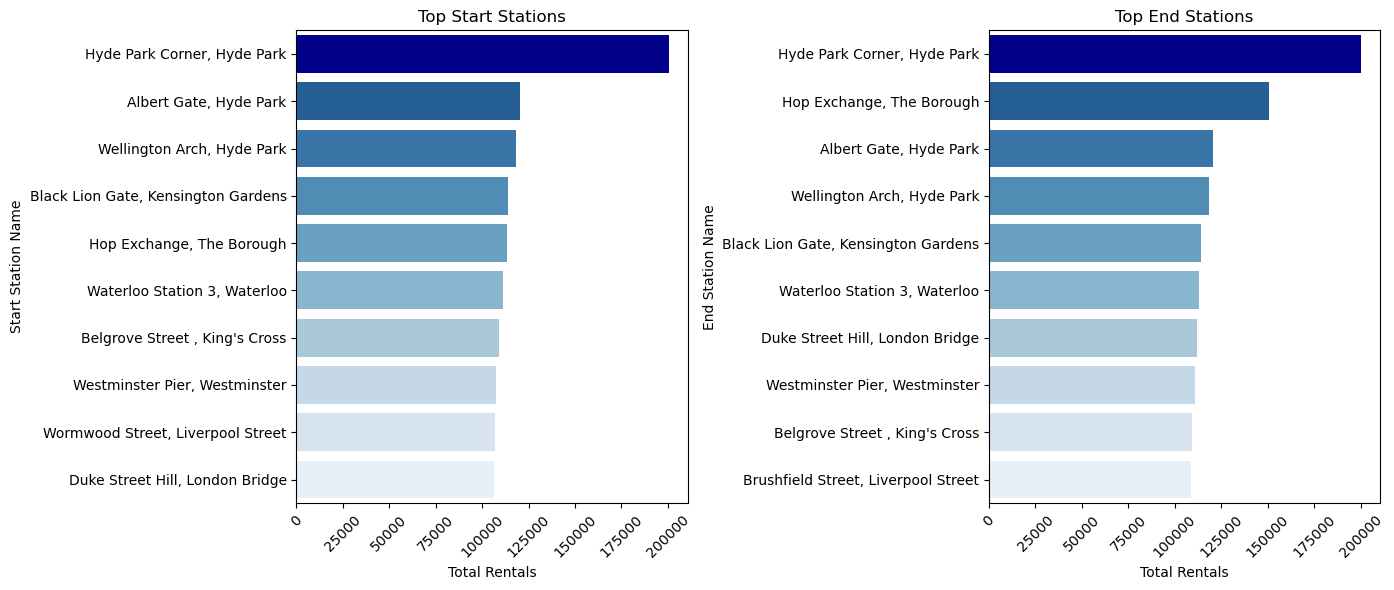

In [159]:

# Get the top start and end stations
start_stations = tfl_cycling_df_preprocessed['StartStation Name'].value_counts().head(10)
end_stations = tfl_cycling_df_preprocessed['EndStation Name'].value_counts().head(10)

# Define the color palette
custom_palette = list(reversed(sns.color_palette("Blues", n_colors=len(start_stations))))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=start_stations.values, y=start_stations.index, palette=custom_palette)
plt.title('Top Start Stations')
plt.xlabel('Total Rentals')
plt.ylabel('Start Station Name')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Find the maximum value in start stations
max_start_station_count = start_stations.max()

# Highlight the maximum value with dark blue
for bar in ax.patches:
    if bar.get_width() == max_start_station_count:
        bar.set_facecolor('darkblue')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=end_stations.values, y=end_stations.index, palette=custom_palette)
plt.title('Top End Stations')
plt.xlabel('Total Rentals')
plt.ylabel('End Station Name')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Find the maximum value in end stations
max_end_station_count = end_stations.max()

# Highlight the maximum value with dark blue
for bar in ax.patches:
    if bar.get_width() == max_end_station_count:
        bar.set_facecolor('darkblue')

plt.tight_layout()
plt.show()



Hyde Park Corner emerges as the most popular start and end station, with a significantly higher usage frequency compared to other stations in the dataset


### Least used start and end stations

In [162]:
# Get the top start and end stations
start_stations = tfl_cycling_df_preprocessed['StartStation Name'].value_counts().tail(10)
end_stations = tfl_cycling_df_preprocessed['EndStation Name'].value_counts().tail(10)


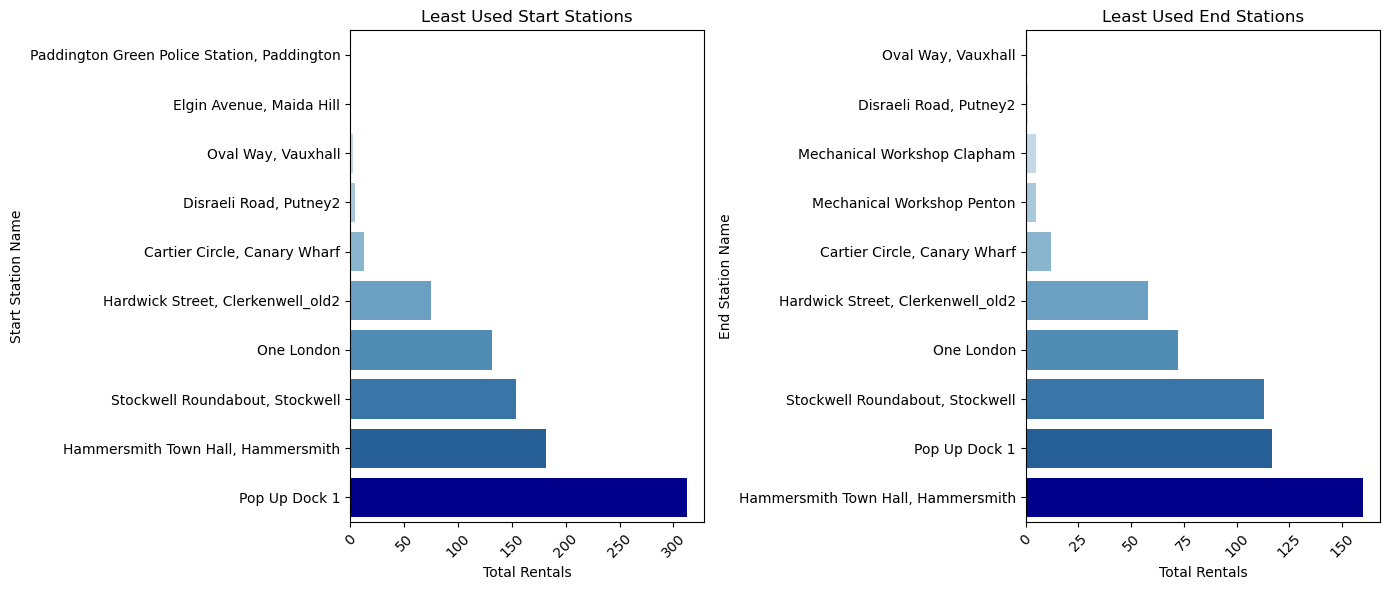

In [415]:
# Reverse the order of your data (start_stations and end_stations)
start_stations = start_stations[::-1]
end_stations = end_stations[::-1]

# Define the color palette
custom_palette = list(sns.color_palette("Blues", n_colors=len(start_stations)))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=start_stations.values, y=start_stations.index[::-1], palette=custom_palette)
plt.title('Least Used Start Stations')
plt.xlabel('Total Rentals')
plt.ylabel('Start Station Name')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Find the maximum value in start stations
max_start_station_count = start_stations.max()

# Highlight the maximum value with dark blue
for bar in ax.patches:
    if bar.get_width() == max_start_station_count:
        bar.set_facecolor('darkblue')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=end_stations.values, y=end_stations.index[::-1], palette=custom_palette)
plt.title('Least Used End Stations')
plt.xlabel('Total Rentals')
plt.ylabel('End Station Name')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Find the maximum value in end stations
max_end_station_count = end_stations.max()

# Highlight the maximum value with dark blue
for bar in ax.patches:
    if bar.get_width() == max_end_station_count:
        bar.set_facecolor('darkblue')

plt.tight_layout()
plt.show()


Paddington green police station emerges as the least popular start station and Oval way as the least popular end station

In [165]:
# Group by 'StartStation Name' and 'EndStation Name' and count the occurrences
popular_routes = tfl_cycling_df_preprocessed.groupby(['StartStation Name', 'EndStation Name']).size().reset_index(name='Total Rentals by Route')

# Sort the routes by count in descending order
popular_routes = popular_routes.sort_values(by='Total Rentals by Route', ascending=False)

# Get the top 10 popular routes
top_10_routes = popular_routes.head(30)


In [166]:
top_10_routes

,StartStation Name,EndStation Name,Total Rentals by Route
239895,"Hyde Park Corner, Hyde Park","Hyde Park Corner, Hyde Park",45632
17099,"Aquatic Centre, Queen Elizabeth Olympic Park","Aquatic Centre, Queen Elizabeth Olympic Park",42669
8898,"Albert Gate, Hyde Park","Albert Gate, Hyde Park",20493
49172,"Black Lion Gate, Kensington Gardens","Black Lion Gate, Kensington Gardens",19220
335648,"Park Lane , Hyde Park","Park Lane , Hyde Park",18998
464437,"Triangle Car Park, Hyde Park","Triangle Car Park, Hyde Park",18136
348103,"Podium, Queen Elizabeth Olympic Park","Podium, Queen Elizabeth Olympic Park",15734
396163,"Serpentine Car Park, Hyde Park","Serpentine Car Park, Hyde Park",9948
495838,"Wellington Arch, Hyde Park","Wellington Arch, Hyde Park",9946
332069,"Palace Gate, Kensington Gardens","Palace Gate, Kensington Gardens",9120


## 2. Data Science UseCases

The TFL cycling dataset provides information about bike rentals in London, and it can be used for various data science use cases. Here are some potential use cases for this data:

- Demand Forecasting: Predict future bike rental demand based on historical rental patterns, weather conditions, special events, and other relevant factors. This can help optimize bike availability and allocation.


- Route Optimization: Optimize bike station locations and the allocation of bikes to stations to minimize empty or full stations. Machine learning models can help identify the best locations and rebalancing strategies.

- Pricing Strategy: Analyze the relationship between rental prices, demand, and other factors to determine optimal pricing strategies that maximize revenue and ridership.

- Operational Efficiency: Use data to optimize maintenance schedules, repair, and inspection of bikes and stations to reduce downtime and increase bike availability.

- Seasonal and Temporal Trends: Identify seasonal and temporal patterns in bike rentals. For example, which months, days, or times of day are the busiest, and how does this change over time?

- User Retention: Analyze user behavior to understand why some users stop renting bikes and develop strategies to retain them.

# 3.  Data Science Use Case to Business Model: Demand Forecasting

In [384]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [385]:
# Create a 'Year-Month-Day' column
tfl_cycling_df_preprocessed['Year-Month-Day'] = tfl_cycling_df_preprocessed['Start Date'].dt.strftime('%Y-%m-%d')
rentals_by_day = tfl_cycling_df_preprocessed.groupby('Year-Month-Day').size()
rentals_by_day.columns = ["Year-Month-Day", "Rentals"]

In [386]:
rentals_by_day = rentals_by_day[:-1] # removing the last data point as it contains only 1 value

In [387]:
# Create a 'Year-Month' column
tfl_cycling_df_preprocessed['Year-Month'] = tfl_cycling_df_preprocessed['Start Date'].dt.strftime('%Y-%m')
rentals_by_year_month = tfl_cycling_df_preprocessed.groupby('Year-Month').size()
rentals_by_year_month.columns = ["Year-Month", "Rentals"]

### Time Series Data Visualization

#### Month wise analysis

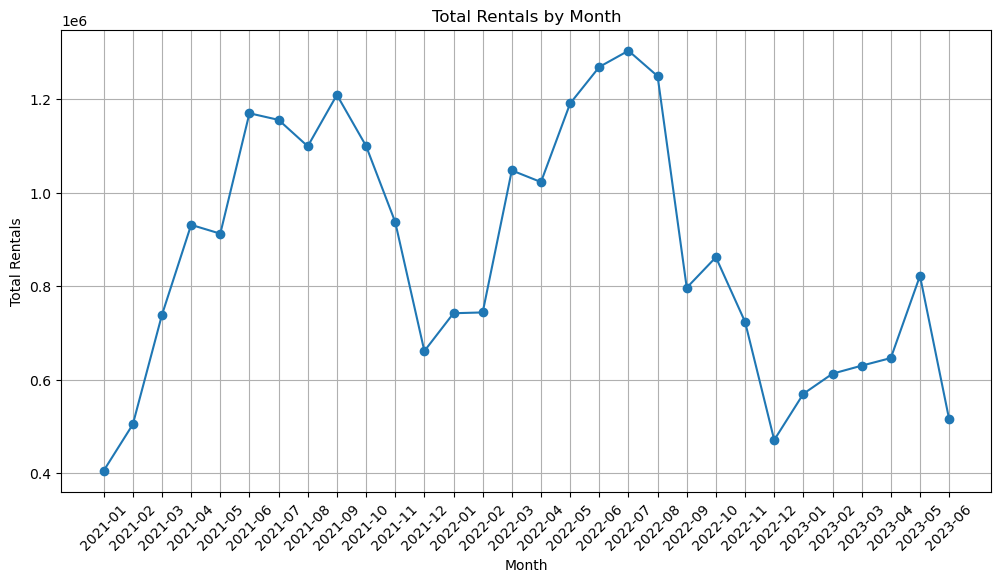

In [388]:
plt.figure(figsize=(12, 6))
plt.plot(rentals_by_year_month.index, rentals_by_year_month, marker='o', linestyle='-')
plt.title('Total Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


In [389]:
rentals_time_series = rentals_by_year_month

In [390]:
# Perform seasonal decomposition
result = seasonal_decompose(rentals_time_series, model='multiplicative', period=12)  # Adjust the period if needed

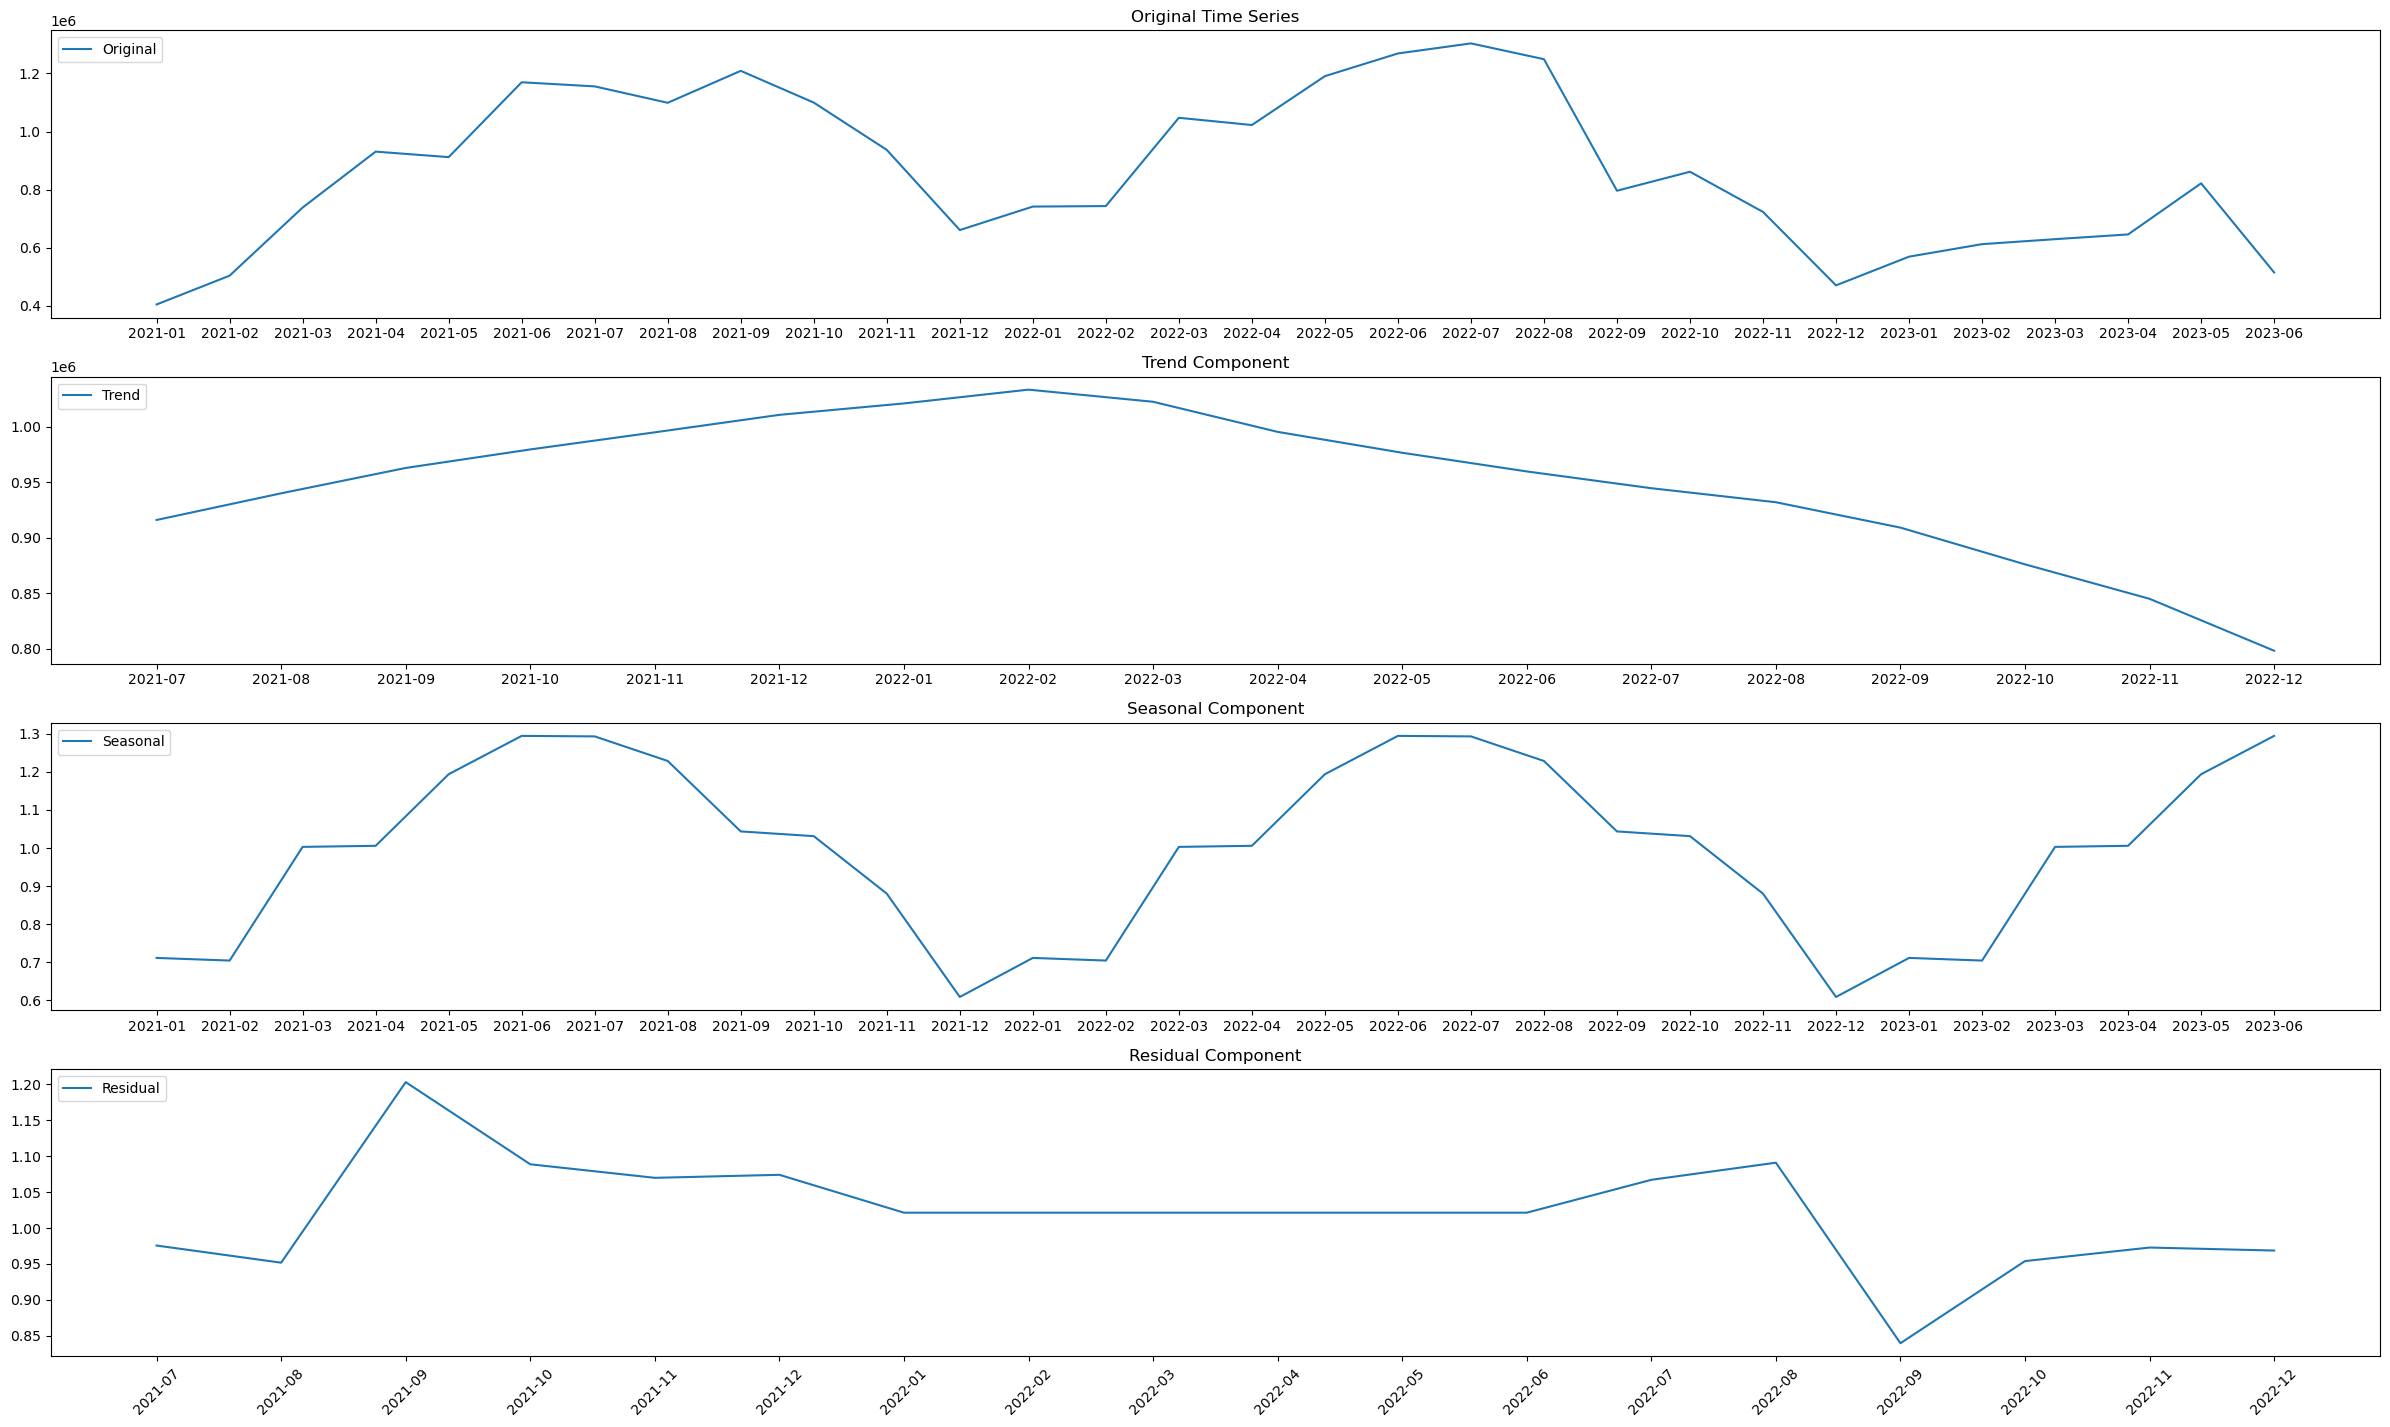

In [391]:
plt.figure(figsize=(24, 14))  # Increase the figure size for better visibility
plt.subplot(411)
plt.plot(rentals_time_series, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


Time series data exhibits multiplicative seasonality and no obvious trend, Exponential Smoothing models, particularly the Holt-Winters Exponential Smoothing model with additive seasonality, are a suitable choice. The Holt-Winters method can also be used with multiplicative seasonality by specifying the 'multiplicative' parameter for the seasonal component.

Here are the characteristics of some time series models in this context:

###### Holt-Winters Exponential Smoothing:

* Suitable for data with multiplicative seasonality.
* Allows you to capture seasonality, trend, and level components.
* It can adapt to changes in seasonality over time.
* The 'multiplicative' parameter can be set to handle multiplicative seasonality.

######  TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal components):

* TBATS models can handle data with both additive and multiplicative seasonality.
* It includes multiple components that capture seasonality, trend, and errors.
* TBATS models are flexible and can be suitable for a wide range of time series data.


Holt-Winters RMSE: 0.198
TBATS RMSE: 0.229


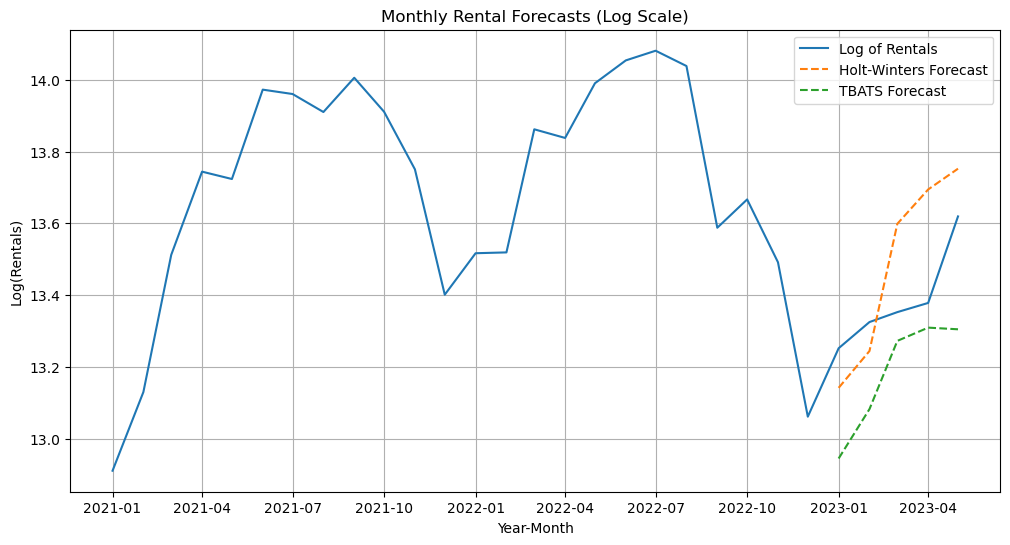

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tbats import TBATS
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create a DataFrame from the provided data
data = {
    'Year-Month': ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05'],
    'Rentals': [405015, 504154, 738522, 930934, 912059, 1169603, 1155434, 1098972, 1208914, 1099712, 936941, 661029, 741875, 743581, 1047369, 1022467, 1190590, 1268701, 1303376, 1249038, 796412, 861664, 723460, 470761, 569504, 612571, 629728, 646025, 821882]
}

df = pd.DataFrame(data)
df['Year-Month'] = pd.to_datetime(df['Year-Month'])

# Take the logarithm of Rentals
df['Log_Rentals'] = np.log(df['Rentals'])

# Split data into training and testing
train = df.iloc[:-5]  # Training data (all except the last 12 months)
test = df.iloc[-5:]  # Testing data (last 12 months)

# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train['Log_Rentals'], seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit(optimized=True)
forecast_hw = fit_hw.forecast(steps=5)
rmse_hw = sqrt(mean_squared_error(test['Log_Rentals'], forecast_hw))

# TBATS
model_tbats = TBATS(seasonal_periods=(12,))
fit_tbats = model_tbats.fit(train['Log_Rentals'])
forecast_tbats = fit_tbats.forecast(steps=5)
rmse_tbats = sqrt(mean_squared_error(test['Log_Rentals'], forecast_tbats))

# Evaluate and compare the models
print(f'Holt-Winters RMSE: {rmse_hw:.3f}')
print(f'TBATS RMSE: {rmse_tbats:.3f}')

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Year-Month'], df['Log_Rentals'], label='Log of Rentals')
plt.plot(test['Year-Month'], forecast_hw, label='Holt-Winters Forecast', linestyle='--')
plt.plot(test['Year-Month'], forecast_tbats, label='TBATS Forecast', linestyle='--')
plt.xlabel('Year-Month')
plt.ylabel('Log(Rentals)')
plt.title('Monthly Rental Forecasts (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

Holt-Winters Exponential Smoothing is recommended as the method of choice for forecasting the next 'N' months. To further improve the accuracy of predictions, it's advisable to collect and incorporate more historical data points, if available. Additionally, ongoing monitoring and model evaluation should be part of the forecasting process to ensure the model's continued reliability.

### Recommendations

#### 1. Supply Chain Optimization
Hyde Park Corner Expansion: Since Hyde Park Corner is the most popular start and end station, invest in expanding and optimizing services in this area
#### 2. Seasonal Marketing
- Optimize Service for Hourly Rentals: Given that the most common usage pattern is for short trips within the same hour, consider offering hourly rental options. 
- Weekday Specials: As Thursdays are the most popular days for rentals, consider introducing weekday specials or discounts to incentivize usage during weekdays.
- Peak Rental Hour Services: To meet the high demand during the 17th hour of the day, ensure that you have an adequate supply of bikes available during this time.
